In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import  LabelEncoder
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from numpy import set_printoptions
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

data = pd.read_csv('../Data//Adult-Data2018.csv', na_values='?')
for column in data.columns:
    if data[column].dtype == type(object):
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column].astype(str))
data.drop(['Screening Type'] ,  axis = 1, inplace = True)
data.drop(['Case No'] ,  axis = 1, inplace = True)
data.replace("?",np.nan,inplace=True) #replace ? with nan

In [ ]:
total_missing_data = data.isnull().sum().sort_values(ascending=False)
percent_of_missing_data = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat(
    [
        total_missing_data, 
        percent_of_missing_data
    ], 
    axis=1, 
    keys=['Total', 'Percent']
)
missing_data.head(10)

,Total,Percent
Class,0,0.0
User,0,0.0
A2,0,0.0
A3,0,0.0
A4,0,0.0
A5,0,0.0
A6,0,0.0
A7,0,0.0
A8,0,0.0
A9,0,0.0


#### No Missing Data

#### ANOVA

In [ ]:
X_Feature = data.iloc[:,0:19]  #independent columns
Y_Feature = data.iloc[:,19]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeaturesANOVA = SelectKBest(score_func=f_classif, k=10)
fitANOVA = bestfeaturesANOVA.fit(X_Feature,Y_Feature)
# summarize scores
set_printoptions(precision=3)
dfscores = pd.DataFrame(fitANOVA.scores_)
dfcolumns = pd.DataFrame(X_Feature.columns)
#concat two dataframes for better visualization 
ANOVAfeatureScores = pd.concat([dfcolumns,dfscores],axis=1)
ANOVAfeatureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(ANOVAfeatureScores )

                     Feature      Score
0                         A1   3.244862
1                         A2   2.164422
2                         A3   4.084455
3                         A4   3.178056
4                         A5   5.213446
5                         A6   3.756774
6                         A7   1.384959
7                         A8   1.237777
8                         A9   3.080772
9                        A10   3.485773
10                       Age   2.068059
11                       Sex   0.920323
12                 Ethnicity   9.289226
13                 Jaundice    2.505607
14                Family_ASD   3.345210
15                 Residence  10.706749
16           Used_App_Before   0.624815
17  Why taken the screening    1.311792
18                     Score   7.320001


In [ ]:
print('Univariate Selection using ANOVA')
print(ANOVAfeatureScores.nlargest(15,'Score'))  #print 15 best features

Univariate Selection using ANOVA
       Feature      Score
15   Residence  10.706749
12   Ethnicity   9.289226
18       Score   7.320001
4           A5   5.213446
2           A3   4.084455
5           A6   3.756774
9          A10   3.485773
14  Family_ASD   3.345210
0           A1   3.244862
3           A4   3.178056
8           A9   3.080772
13   Jaundice    2.505607
1           A2   2.164422
10         Age   2.068059
6           A7   1.384959


#### Chi

In [ ]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fitChi = bestfeatures.fit(X_Feature,Y_Feature)
dfscores = pd.DataFrame(fitChi.scores_)
dfcolumns = pd.DataFrame(X_Feature.columns)
#concat two dataframes for better visualization 
ChifeatureScores = pd.concat([dfcolumns,dfscores],axis=1)
ChifeatureScores.columns = ['Feature','Score']  #naming the dataframe columns
ChifeatureScores

,Feature,Score
0,A1,8.286946
1,A2,11.007706
2,A3,19.606614
3,A4,14.400288
4,A5,24.062725
5,A6,24.748272
6,A7,7.685636
7,A8,4.345684
8,A9,19.115925
9,A10,13.431973


In [ ]:
print('Univariate Selection using chi')
print(ChifeatureScores.nlargest(15,'Score'))  #print 15 best features

Univariate Selection using chi
       Feature        Score
15   Residence  1246.695585
12   Ethnicity   140.631704
18       Score    87.608180
10         Age    74.779026
14  Family_ASD    27.425712
5           A6    24.748272
4           A5    24.062725
13   Jaundice     22.310303
2           A3    19.606614
8           A9    19.115925
3           A4    14.400288
9          A10    13.431973
1           A2    11.007706
0           A1     8.286946
6           A7     7.685636


## correlation

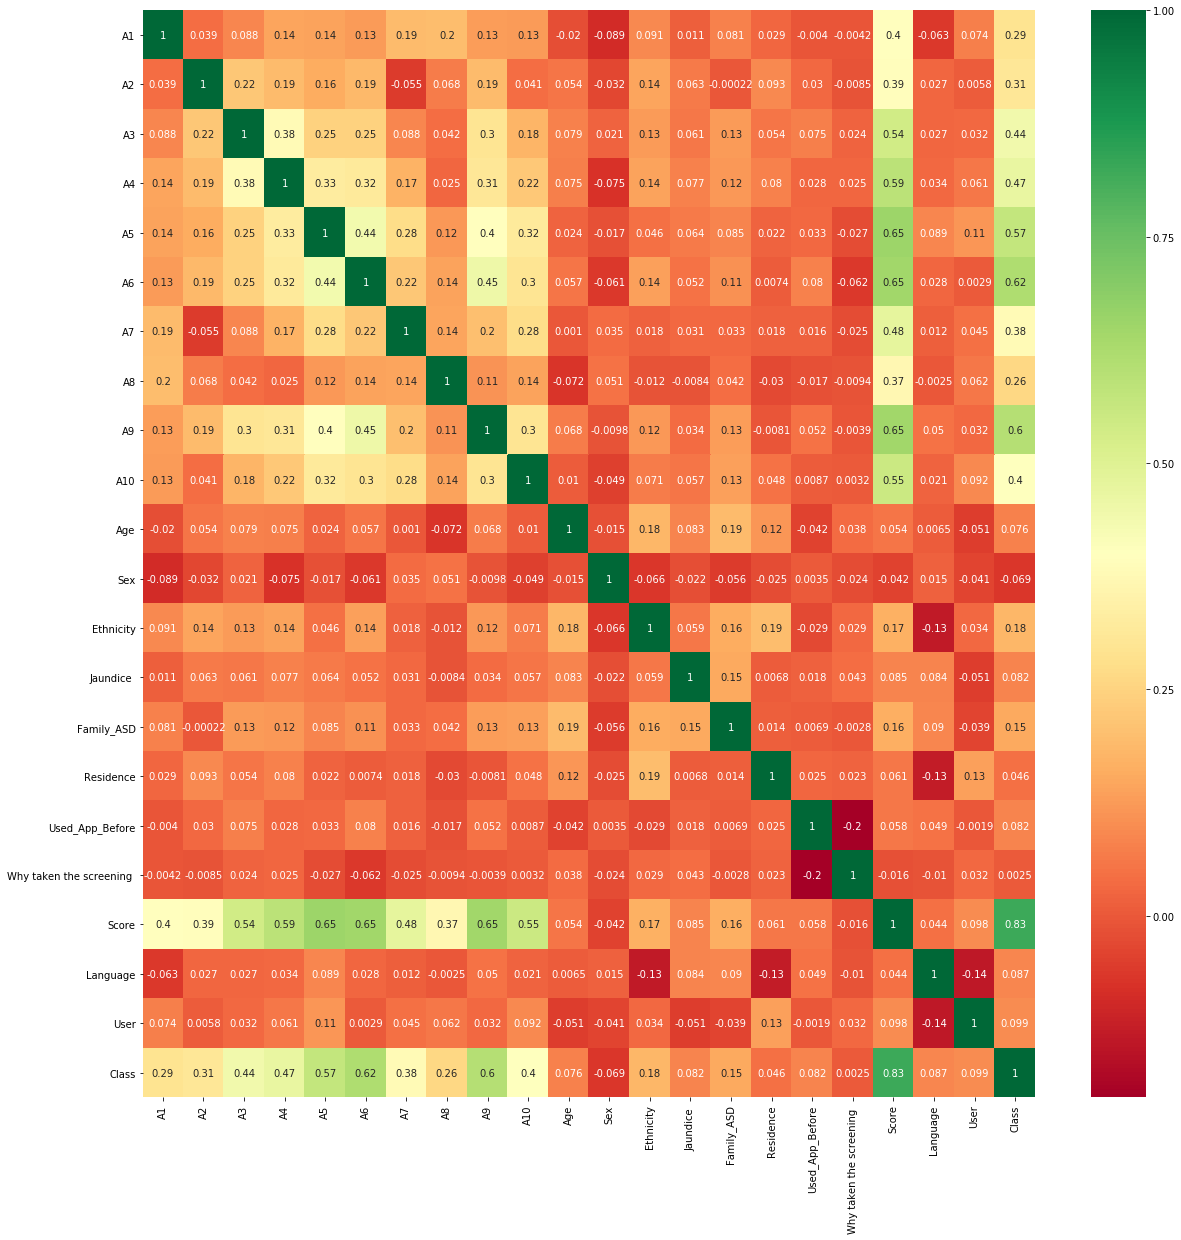

In [ ]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")